### Categorising Customers based on Spending

In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [14]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


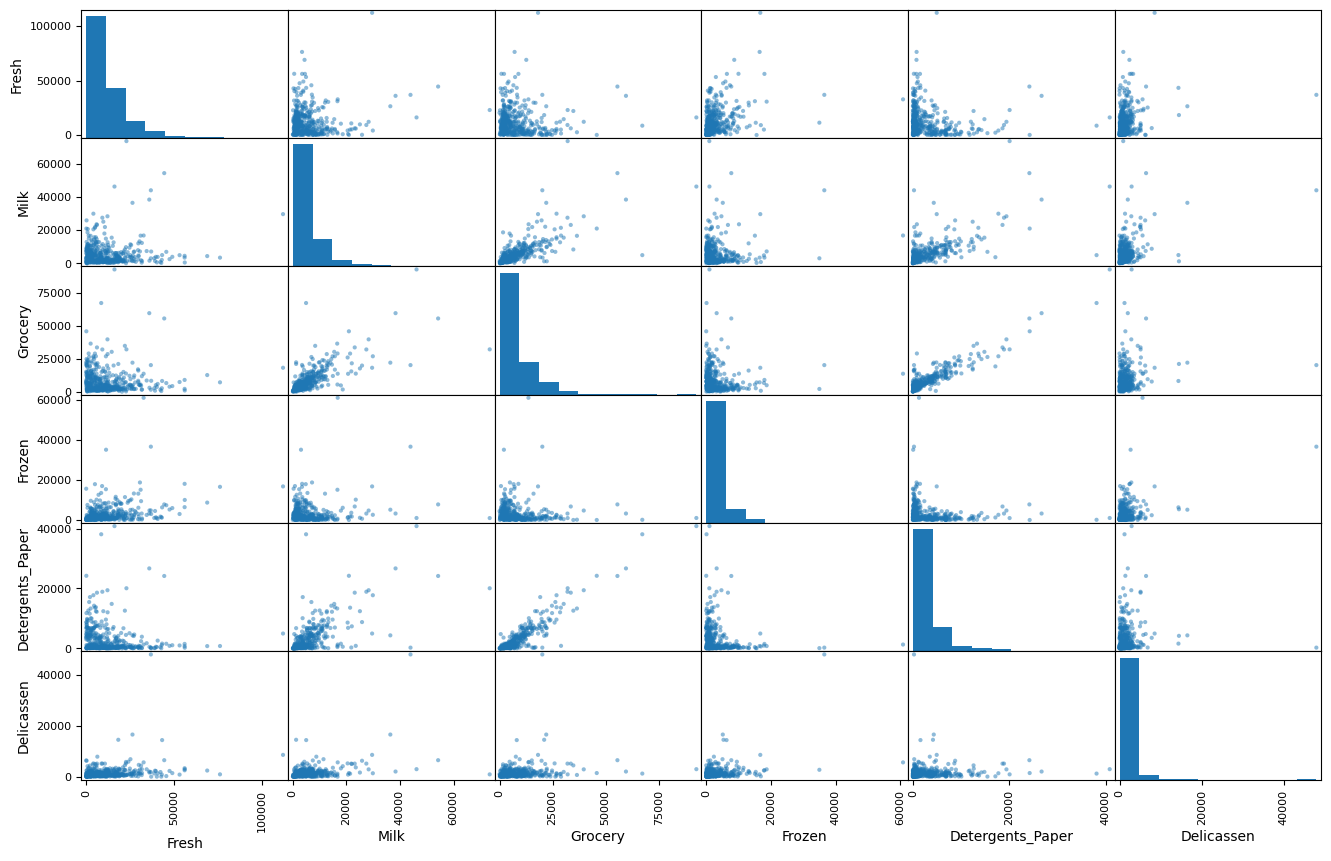

In [15]:
# Scatter plot of all the features 
pd.plotting.scatter_matrix(data, figsize = (16,10));

### Since the data is skewed we perform a log transform

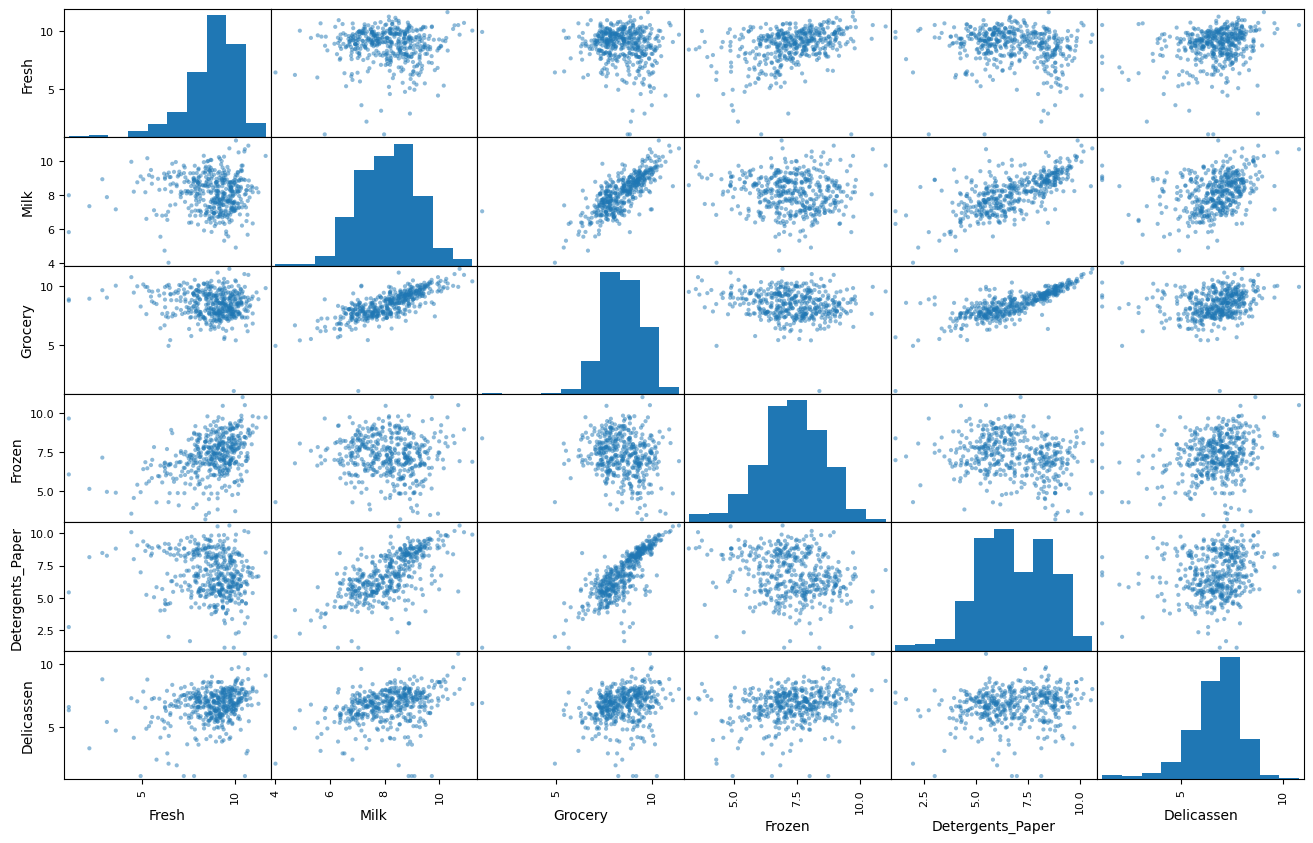

In [16]:
# We transform the data using the natural logarithm
data_trans = data.apply(lambda x: np.log(x))

# Scatter plot matrix for each pair of transformed features
pd.plotting.scatter_matrix(data_trans, figsize = (16,10));

#### We put the data into a numpy array to use in kmeans

In [17]:
X = data_trans.values

### Elbow curve

c:\Users\Rahul Mitra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Rahul Mitra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Rahul Mitra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Rahul Mitra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

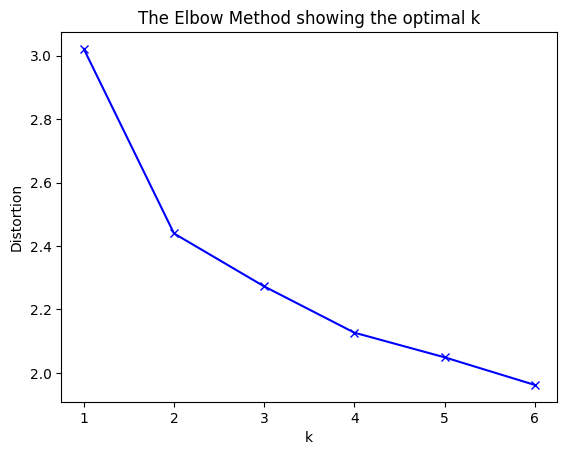

In [18]:
# k means determine k
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #distortion.append(clusters.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Based on the graph we can choose k=2 or k=4

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

c:\Users\Rahul Mitra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

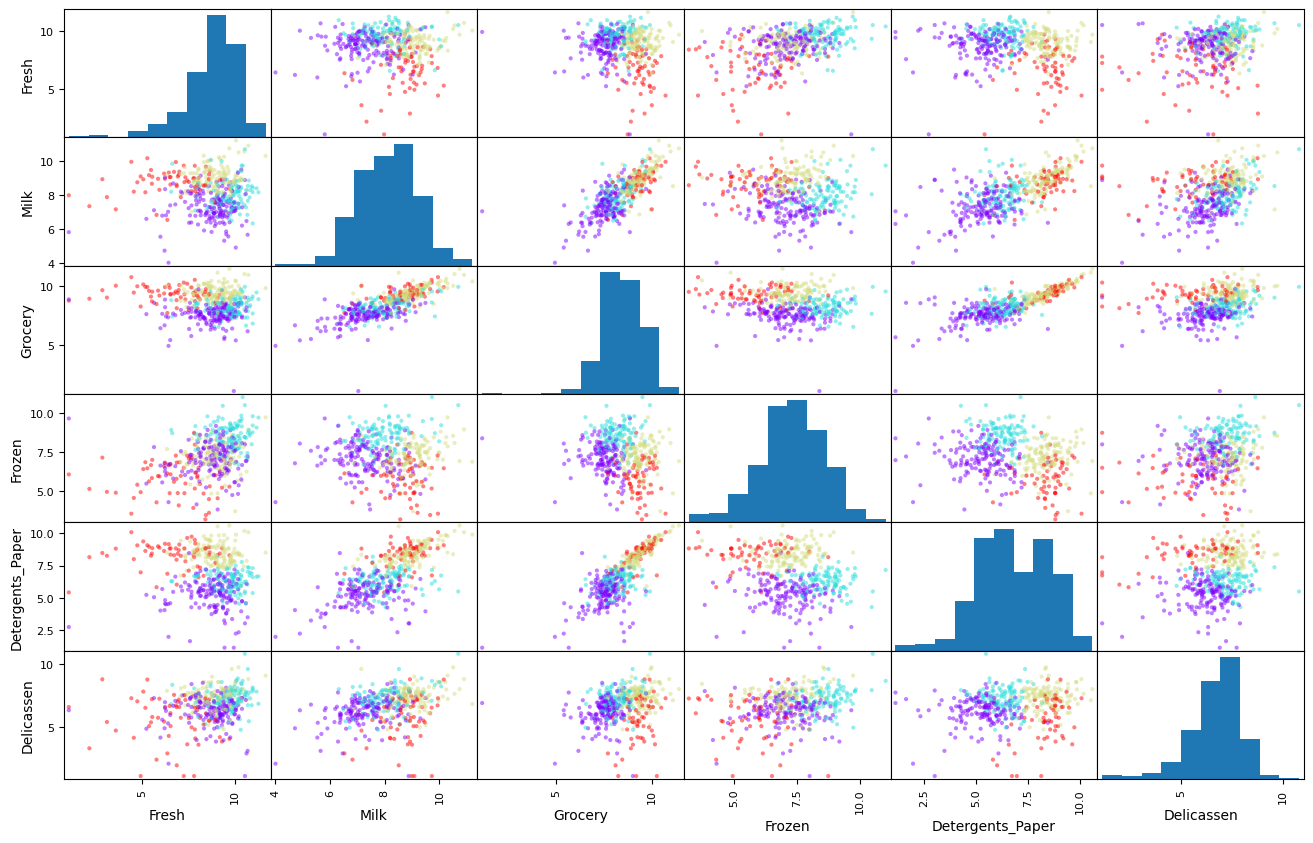

In [23]:
# Scatter plot matrix for each pair of transformed features along the the cluster centers
pd.plotting.scatter_matrix(data_trans, figsize = (16,10),c=kmeans.labels_, cmap='rainbow');

### Reporting values of the cluster centers

In [24]:
centers=kmeans.cluster_centers_
centers = np.exp(kmeans.cluster_centers_)
centers = pd.DataFrame(centers, columns = data.keys())
centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5989.223479,1415.746340,1770.125975,1167.145355,177.925105,472.954906
1,15133.350245,2977.087745,3590.488896,5289.309335,518.646143,1363.883773
2,7954.909800,7995.603849,12230.539110,1334.431413,4711.328017,1540.479532
3,782.069679,6127.412649,11040.554095,321.440861,4126.366006,251.618634
